MC simulated samples of lambda and D

In [112]:
import uproot
import numpy as np
import pandas as pd
import awkward as ak
import os

import matplotlib.pyplot as plt

In [22]:
dir_path = "/global/cfs/cdirs/atlas/gottino/Charm/Analysis/run_batch_gup/ntuples"

ntuples = os.listdir(dir_path)
print(ntuples)

['CharmAnalysis.mc.ForcedDecay.Dplus.tree.root', 'CharmAnalysis.mc.ForcedDecay.LabmdaC.tree.root']


In [177]:
#processes ntunples given directory: returns trees 
def process_ntuple(ntuples):
    tree_list = []
    for ntuple in ntuples:
        file = uproot.open(dir_path + "/" + ntuple)
        tree = file["CharmAnalysis;1"]
        tree_list.append(tree)
    return tree_list

#event #, list of branches, and batch size: returns tuple of branches with data
def show(event, branches, batch_size):
    current_event = 0
    for array in process_ntuple(ntuples)[1].iterate(branches, step_size = batch_size, library = "pd"):
        arrays = array[branches]
        if current_event == event:
            break
        current_event+=1
    return arrays


In [178]:
trees = process_ntuple(ntuples)
trees

[<TTree 'CharmAnalysis' (166 branches) at 0x154f180fca00>,
 <TTree 'CharmAnalysis' (166 branches) at 0x154f0dea5940>]

In [181]:
df = show(0, ["DMesons_pt", "DMesons_m", "DMesons_eta", "DMesons_phi"], 100)
df

,DMesons_pt,DMesons_m,DMesons_eta,DMesons_phi
0,"[15837.3623046875, 15837.3623046875]","[2277.830078125, 2369.549072265625]","[-1.9853405952453613, -1.9853405952453613]","[-2.1627724170684814, -2.1627724170684814]"
1,[],[],[],[]
2,[],[],[],[]
3,"[98787.6796875, 98787.6796875]","[1919.40869140625, 2260.435791015625]","[-0.2930956184864044, -0.2930956184864044]","[-2.693368434906006, -2.693368434906006]"
4,[],[],[],[]
...,...,...,...,...
95,"[22555.076171875, 22555.076171875]","[1984.99658203125, 2287.811279296875]","[0.752723217010498, 0.752723217010498]","[-0.010955027304589748, -0.010955027304589748]"
96,[],[],[],[]
97,[],[],[],[]
98,"[29804.958984375, 29804.958984375]","[1753.2430419921875, 2207.156982421875]","[0.38043972849845886, 0.38043972849845886]","[2.1277098655700684, 2.1277098655700684]"


In [168]:
DplusTree = trees[0]
LambdaCTree = trees[1]

DplusTree["DMesons_pt"].array()

<Array [[5.74e+03, 5.74e+03], ..., [...]] type='20000000 * var * float32'>

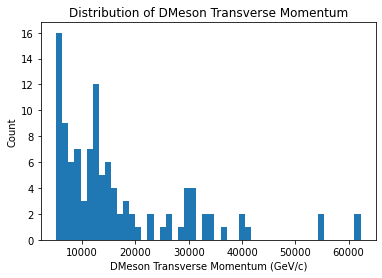

In [169]:
DMesons_pt = []
for pt in df['DMesons_pt']:
    DMesons_pt.extend(pt)

# Plot the histogram
plt.hist(DMesons_pt, bins=50)
plt.xlabel('DMeson Transverse Momentum (GeV/c)')
plt.ylabel('Count')
plt.title('Distribution of DMeson Transverse Momentum')
plt.show()

In [164]:
print(len(df["DMesons_pt"]))

1000
